In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import my_txtutils
import re
import nltk
mypath='./new_txts/'
txts='./txts/'

In [13]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(txts) if isfile(join(txts, f))]
print(onlyfiles)

['acts_new.txt', 'gal_eph_new.txt', 'heb_new.txt', 'jam_jud_new.txt', 'john_new.txt', 'jud_rev_new.txt', 'luke_8_john_new.txt', 'mark01_new.txt', 'matt02_new.txt', 'matt_new.txt', 'phil_col_new.txt', 'thes_tim_new.txt', 'tit_phl_new.txt']


In [5]:
#large files
def large_f():
    #filenames = ['file1.txt', 'file2.txt', ...]
    with open(mypath+'full.txt', 'w') as outfile:
        for fname in onlyfiles:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
#large files
def decimate_f(f):
    #filenames = ['file1.txt', 'file2.txt', ...]
    with open(mypath+'tmp.txt', 'w') as outfile:
        with open(mypath+f) as infile:
            lc=0
            for line in infile:
                wrap=False
                cx=0
                tmp=""
                for i in line:
                    wrap=True if cx>99 else False
                    if (wrap==True and i==' '):
                        tmp+='\n'
                        cx=-1
                    else:
                        tmp+=i
                    cx+=1
                outfile.write(tmp)
                lc+=1
    print(lc,'lines written')
decimate_f('full.txt')

311 lines written


In [22]:
#small files
def small_f():
    #filenames = ['file1.txt', 'file2.txt', ...]
    with open(mypath+'full.txt', 'w') as outfile:
        for fname in onlyfiles:
            print('writing file',fname)
            with open(txts+fname) as infile:
                outfile.write(infile.read())
    return open(mypath+"full.txt").read()

In [24]:
txt=small_f()
words=re.sub(' +', ' ',txt.replace('\n',' ')).split(' ')
len(words)

writing file acts_new.txt
writing file gal_eph_new.txt
writing file heb_new.txt
writing file jam_jud_new.txt
writing file john_new.txt
writing file jud_rev_new.txt
writing file luke_8_john_new.txt
writing file mark01_new.txt
writing file matt02_new.txt
writing file matt_new.txt
writing file phil_col_new.txt
writing file thes_tim_new.txt
writing file tit_phl_new.txt


649190

In [25]:
len(txt)

6507438

In [2]:
# these must match what was saved !
ALPHASIZE = my_txtutils.ALPHASIZE
NLAYERS = 3
INTERNALSIZE = 512

ok02 ="checkpoints/rnn_train_1560839489-30000000" # okrika 2019-06-18
ok03 ="checkpoints/rnn_train_1563601394-60000000" # okrika 2019-07-20
bb01 ="checkpoints/rnn_train_1563814502-18000000" # bible 2019-07-22

author=ok03

ncnt = 0
with tf.Session() as sess:
    # new_saver = tf.train.import_meta_graph('checkpoints/rnn_train_1512567262-0.meta')
    new_saver = tf.train.import_meta_graph(author+'.meta')
    new_saver.restore(sess, author)
    x = my_txtutils.convert_from_alphabet(ord("L"))
    x = np.array([[x]])  # shape [BATCHSIZE, SEQLEN] with BATCHSIZE=1 and SEQLEN=1

    # initial values
    y = x
    h = np.zeros([1, INTERNALSIZE * NLAYERS], dtype=np.float32)  # [ BATCHSIZE, INTERNALSIZE * NLAYERS]
    for i in range(1000):
        yo, h = sess.run(['Yo:0', 'H:0'], feed_dict={'X:0': y, 'pkeep:0': 1., 'Hin:0': h, 'batchsize:0': 1})
        #print(tf.shape(yo))
        #print(len(yo))
        c = my_txtutils.sample_from_probabilities(yo, topn=2)
        y = np.array([[c]])  # shape [BATCHSIZE, SEQLEN] with BATCHSIZE=1 and SEQLEN=1
        c = chr(my_txtutils.convert_to_alphabet(c))
        print(c, end="")
        if c == '\n':
            ncnt = 0
        else:
            ncnt += 1
        if ncnt == 100:
            print("")
            ncnt = 0


INFO:tensorflow:Restoring parameters from checkpoints/rnn_train_1563814502-18000000
 O D D ,   a n d   s a i d ,   I   w i l l   s a y   u n t o   h i s   s o n ,   T h o u   s h a l t
   n o t   b e   s a v e d ,   t h a t   I   s a y   u n t o   t h e m ,   W e   h a v e   c o n s u
 m e d   m y   f a t h e r ,   a n d   t h e   m i g h t y   m a n   t h a t   s h a l l   b e   u n
 c l e a n   u n t o   h i m ,   a n d   t h e   L O R D   h a t h   s a i d ,   I   w i l l   p r o
 v o k e   m e   t o   m e ,   a n d   t h e   r e m e m b r i n g   o f   t h e   c h i l d r e n  
 o f   I s r a e l   s a w   t h e   L O R D ,   t h e   L O R D   s p o k e n   u n t o   h e r ,  
 T h e   L O R D   s h a l l   s a y ,   T h e r e f o r e   s h a l l   t h e y   s a y   u n t o  
 h i m ,   W h o   h a v e   s e t   m e   t o   p a s s   t o   t h e   w i l l   o f   t h e   s e
 a   t h e r e o f ,   t h e n   s a y   t h e   L O R D   t h e   G o d   o f   I s r a e l ,   I  
 p r a 

In [35]:
def pcx(txt):
    # these must match what was saved !
    ALPHASIZE = my_txtutils.ALPHASIZE
    NLAYERS = 3
    INTERNALSIZE = 512

    ok02 ="checkpoints/rnn_train_1560839489-30000000" # okrika 2019-06-18
    ok03 ="checkpoints/rnn_train_1563601394-60000000" # okrika 2019-07-20

    author=ok03

    ncnt = 0
    with tf.Session() as sess:
        # new_saver = tf.train.import_meta_graph('checkpoints/rnn_train_1512567262-0.meta')
        new_saver = tf.train.import_meta_graph(author+'.meta')
        new_saver.restore(sess, author)
        x = my_txtutils.convert_from_alphabet(ord(txt[0]))
        x = np.array([[x]])  # shape [BATCHSIZE, SEQLEN] with BATCHSIZE=1 and SEQLEN=1

        # initial values
        y = x
        h = np.zeros([1, INTERNALSIZE * NLAYERS], dtype=np.float32)  # [ BATCHSIZE, INTERNALSIZE * NLAYERS]
        arr=[]
        for i in range(len(txt)-1):
            yo, h = sess.run(['Yo:0', 'H:0'], feed_dict={'X:0': y, 'pkeep:0': 1., 'Hin:0': h, 'batchsize:0': 1})
            c = my_txtutils.convert_from_alphabet(ord(txt[i+1]))
            d = my_txtutils.sample_from_probabilities(yo, topn=1)
            d = chr(my_txtutils.convert_to_alphabet(d))
            y = np.array([[c]])  # shape [BATCHSIZE, SEQLEN] with BATCHSIZE=1 and SEQLEN=1
            y1=np.reshape(yo,[ALPHASIZE,-1])
            y1=y1.flatten()
            #c = chr(my_txtutils.convert_to_alphabet(i))
            print(txt[i],':',c,':',y1[c],',max=',np.max(y1),"='%s' or %s"%(chr(my_txtutils.convert_to_alphabet(np.argmax(y1))),d))
            arr.append(y1[c])
    return np.log2(np.sum(arr))*(-1/len(txt))
    #return np.prod(arr))**(-1/len(txt)

In [36]:
t='''duko ini piri se i duko o piriabe, o bo minea b
u dapu ori oria okweinma piki nemikase bereni nyan
a apu ma piri okuma, o nwose i beme, i duko o piri
abe iya ani ineda o bara bia okweinma nwo duko o p
irisam, aniatibi o bereni i poribia bara. ani okum
a ini o bara sikima okuma aniatibi ari ineda i si 
miemie ye mie bu, o bo ma na o se mgbesechin mi og
ono bakubabia. okuma ominea bie sime tamuno be ber
enibia bo goyegoye i da be se o piribia borosam, o
kuma omine inema miese o tomonikiri mi be okwein'''
pcx(t)

d : 87 : 0.0 ,max= 0.0770766 =' ' or  
u : 77 : 0.0 ,max= 0.895978 =' ' or  
k : 81 : 0.0 ,max= 0.5329333 =' ' or  
o : 2 : 0.0 ,max= 0.99995935 =' ' or  
  : 75 : 0.0 ,max= 0.36144635 ='m' or m
i : 80 : 0.0 ,max= 0.9999676 =' ' or  
n : 75 : 0.0 ,max= 0.18348454 =' ' or  
i : 2 : 0.0 ,max= 0.9999759 =' ' or  
  : 82 : 0.0 ,max= 0.7913743 =' ' or  
p : 75 : 0.0 ,max= 0.9995127 =' ' or  
i : 84 : 0.0 ,max= 0.46761307 ='i' or i
r : 75 : 0.0 ,max= 0.9997508 =' ' or  
i : 2 : 0.0 ,max= 0.76876736 ='i' or i
  : 85 : 0.0 ,max= 0.9999703 =' ' or  
s : 71 : 0.0 ,max= 0.30323997 ='s' or s
e : 2 : 0.0 ,max= 0.9999521 =' ' or  
  : 75 : 0.0 ,max= 0.41298324 ='r' or r
i : 2 : 0.0 ,max= 0.9999945 =' ' or  
  : 70 : 0.0 ,max= 0.27091473 =' ' or  
d : 87 : 0.0 ,max= 0.9999479 =' ' or  
u : 77 : 0.0 ,max= 0.35302648 ='a' or a
k : 81 : 0.0 ,max= 0.9999987 =' ' or  
o : 2 : 0.0 ,max= 0.33377552 ='i' or i
  : 81 : 0.0 ,max= 0.99999106 =' ' or  
o : 2 : 0.0 ,max= 0.47501603 ='b' or b
  : 82 : 0.0 ,max= 0.

-0.006836573282877604

# these must match what was saved !
ALPHASIZE = my_txtutils.ALPHASIZE
NLAYERS = 3
INTERNALSIZE = 512

ok02 ="checkpoints/rnn_train_1560839489-30000000" # okrika 2019-06-18
ok03 ="checkpoints/rnn_train_1563601394-60000000" # okrika 2019-07-20

author=ok03

ncnt = 0
with tf.Session() as sess:
    # new_saver = tf.train.import_meta_graph('checkpoints/rnn_train_1512567262-0.meta')
    new_saver = tf.train.import_meta_graph(author+'.meta')
    new_saver.restore(sess, author)
    x = my_txtutils.convert_from_alphabet(ord("L"))
    x = np.array([[x]])  # shape [BATCHSIZE, SEQLEN] with BATCHSIZE=1 and SEQLEN=1

    # initial values
    y = x
    h = np.zeros([1, INTERNALSIZE * NLAYERS], dtype=np.float32)  # [ BATCHSIZE, INTERNALSIZE * NLAYERS]
    yo, h = sess.run(['Yo:0', 'H:0'], feed_dict={'X:0': y, 'pkeep:0': 1., 'Hin:0': h, 'batchsize:0': 1})
    y=np.reshape(yo,[98,-1])
    y=y.flatten()
    v="hello world"
    for i in range(ALPHASIZE):
        #print(tf.shape(yo))
        #print(len(yo))
        #c = my_txtutils.sample_from_probabilities(yo, topn=2)
        #y = np.array([[c]])  # shape [BATCHSIZE, SEQLEN] with BATCHSIZE=1 and SEQLEN=1
        c = chr(my_txtutils.convert_to_alphabet(i))
        print(c,':',y[i])
        if c == '\n':
            ncnt = 0
        else:
            ncnt += 1
        if ncnt == 100:
            print("")
            ncnt = 0

In [16]:
import math
def pc4p(prob,words):
    #return np.log2(np.sum(arr))*(-1/len(txt))
    return math.exp(prob)**(-1/words)
def pc4lp(prob,words):
    #return np.log2(np.sum(arr))*(-1/len(txt))
    return prob**(-1/words)
print('lstm ppx=',pc4lp(math.exp(-24.2721),39624))
print('model ppx=',pc4lp(math.exp(-26.2484),39624))

lstm ppx= 1.000612748222892
model ppx= 1.0006626563667096


In [20]:
l=len('tamuno be bi na mie nwo be ye mi i nemime, oloko mi bu i boro karakaraye mi now selebia oku dawobosam. i nemi kpainmame na iri torumgbolupun apu ma be ateli diebo-e, enekubo so kanakana bie sime apu ma piri bo-e, se yenemikapu ma dagbukukumari bo-e, ase na ire na yediebo-e. i piki bereniokime na oloko mi bie mi dawonemi na kokomaye mi na be bein mi i nwo nyanasam. i ye se jin-apu dieme, nde miese i ye se ibu dieka bara i tamuno bere dukome na, furu ma, okuma iri i furu-apu i nwo beme, sefi ma okuma iri i sefi-au i oru teke dikisimame, okuma i oruwari ma bie ye furu-au i bomame na i tamuno oloko nwo nemi warabe, okuma i bugerere se tamuno be toru chua-au, oria oloko mi nwo kan bu fiafiadiri mi nwo beme, omine juapu ma gose, jinseapu ma tamuno be dukosimame.    i nemikase oloko mi duko ye mieme bebe, iya bupele mi yela ye-e, okuma i nemikase oloko mi dukoye mieke bebe, mgboku ibu soni i peleka ibiteinme. jinsebo be se bupeleka bo be nemikase oloko mi dukoye mieme nwo be okuma')
print(l)
print('lstm ppx=',pc4p(-488.6672058105469,l))
print('model ppx=',pc4p(-583.2510375976562,l))
l=len('a bime ari ominea ogboku soni, tomoni mie se ini si bu vinpiki, isi jinseapu ma bie a miesa bara mi')
print(l)
print('lstm ppx=',pc4p(-56.092166900634766,l))
print('model ppx=',pc4p(-65.91641998291016,l))

988
lstm ppx= 1.639846164055032
model ppx= 1.8045929579573747
99
lstm ppx= 1.762243202625417
model ppx= 1.9460903749339529


In [14]:
import json
#with open('vloss_main.json','r') as f:
with open('vloss.json','r') as f:
    vloss=json.load(f)
#print(vloss) 
plt.figure()
plt.plot(vloss)

5.109089028063325e-12

In [1]:
!pip install https://github.com/kpu/kenlm/archive/master.zip --log kenlm.log

  Using cached https://github.com/kpu/kenlm/archive/master.zip
  Running setup.py clean for kenlm
Failed to build kenlm
    Running setup.py install for kenlm: started
    Running setup.py install for kenlm: finished with status 'error'


  ERROR: Failed building wheel for kenlm
ERROR: Command errored out with exit status 1: 'H:\app\msys32\home\u1273400\python_research\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\U1273400\\AppData\\Local\\Temp\\pip-req-build-unby0agv\\setup.py'"'"'; __file__='"'"'C:\\Users\\U1273400\\AppData\\Local\\Temp\\pip-req-build-unby0agv\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\U1273400\AppData\Local\Temp\pip-record-s61oueom\install-record.txt' --single-version-externally-managed --compile --install-headers 'H:\app\msys32\home\u1273400\python_research\Include\kenlm' Check the logs for full command output.


In [1]:
import json
with open('vloss_slgru201219.json','r') as f:
    vloss=json.load(f)

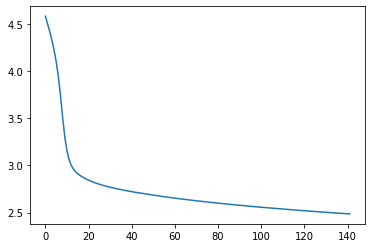

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# product = reduce((lambda x, y: x * y), [1, 2, 3, 4])

plt.figure()
plt.plot(vloss)

In [ ]:
import csv
with open('vloss.csv', mode='w') as vlf:
    vlc = csv.writer(vlf, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for row in vloss:
        vlc.writerow(row)

In [ ]:
PATH = './cifar_net.pth'
net = Net()
net.load_state_dict(torch.load(PATH))

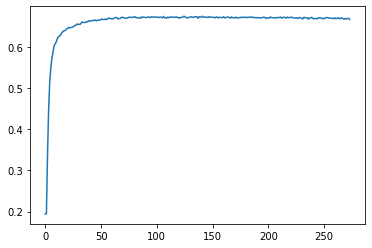

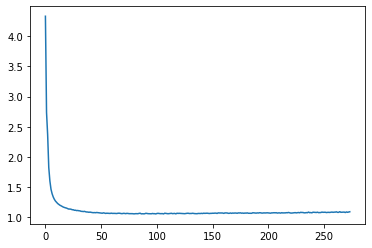

In [16]:
import json
with open('vloss_main.json','r') as f:
    vloss=json.load(f)
#print(vloss) 
vloss=json.loads(vloss.replace("'",'"'))
plt.figure()
plt.plot(vloss['acc'])
plt.figure()
plt.plot(vloss['loss'])


In [ ]:
import kenlm
model = kenlm.Model('rpynotes/ok-rnn/txteval/val/text.arpa')